In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.cluster import KMeans

pd.options.mode.chained_assignment = None

Кластеризация  
Выбрал дата сет кредиторов банке.  
Банк решил провести исследование, почему пошел большой отток клиентов в их банке

In [2]:
df1 = pd.read_csv("BankChurners.csv")
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Автор датасета предлагает удалить последние 2 столбца, для чистоты данных.

In [4]:


df = df1.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1) 
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Построил диаграммы для лучшего понимания системы.

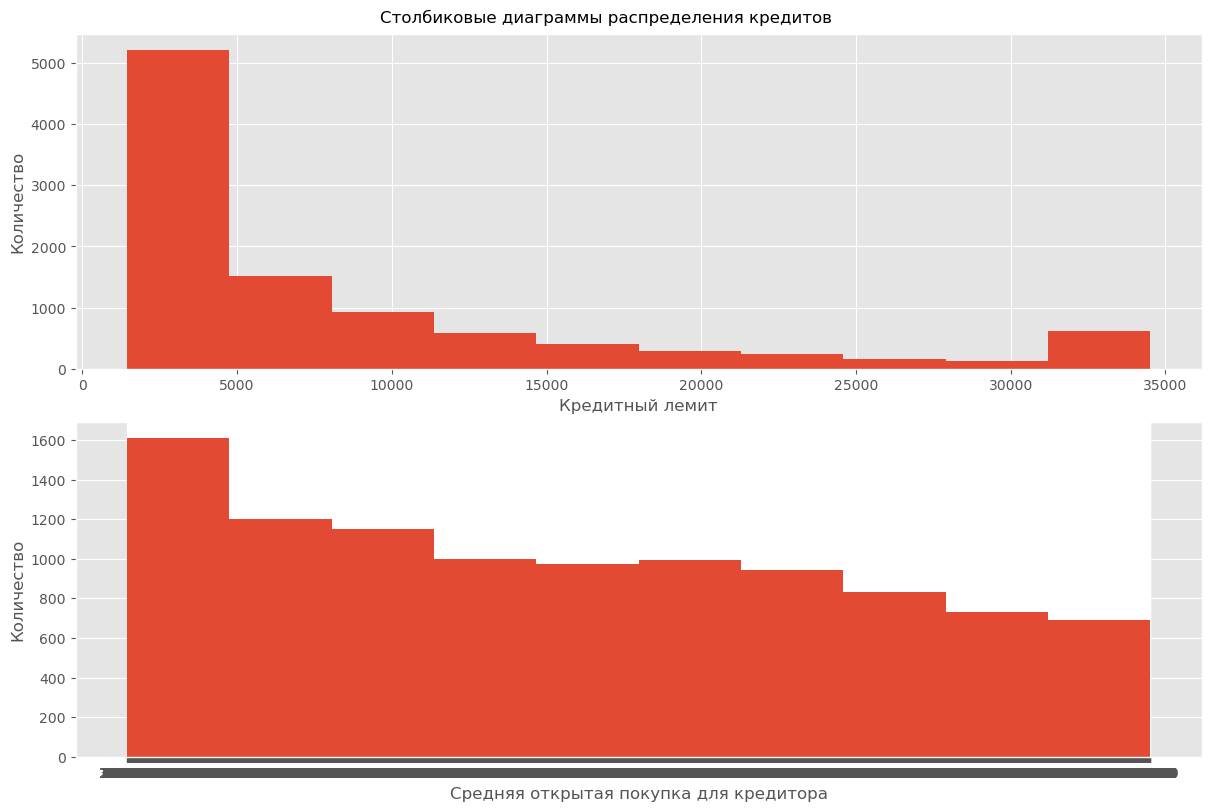

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True)
fig.suptitle('Столбиковые диаграммы распределения кредитов')
ax1.hist(df['Credit_Limit'], stacked=True, density=False)
ax1.set_ylabel('Количество')
ax1.set_xlabel('Кредитный лемит')
pseudo = list(str(x) for x in df['Avg_Open_To_Buy'])
ax2.hist(pseudo, stacked=True, density=False)
ax2.set_ylabel('Количество')
ax2.set_xlabel('Средняя открытая покупка для кредитора')
plt.show()

In [41]:
df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [7]:
# Создаем матрицу корреляции
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\kanze\AppData\Local\Temp\ipykernel_2028\2027538049.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [8]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Выбираем признаки, с которыми будем дальше работать

In [9]:

claster_tags = ['CLIENTNUM', 'Customer_Age',
       'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [10]:
X = df[claster_tags]

In [11]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [14]:
def calculate_metrics(df, max_clusters):
    km_scores= []
    silhouette_scores = []
    db_scores = []

    for i in range(2, max_clusters):
        print("Количество кластеров: {}".format(i))

        km = KMeans(n_clusters=i, random_state=0, n_init=1).fit(df)
        preds = km.predict(df)

        km_score = -km.score(df)
        km_scores.append(km_score)
        print("Метрика K-Means (локоть): {}".format(km_score))

        silhouette = silhouette_score(df,preds)
        silhouette_scores.append(silhouette)
        print("Метрика силуэтов: {}".format(silhouette))

        db = davies_bouldin_score(df,preds)
        db_scores.append(db)
        print("Метрика Davies Bouldin: {}".format(db))

        print("-"*100)
    return {"km": km_scores, "silhouette":silhouette_scores, "db": db_scores}


Максимальное количество кластеров для рассмотрения, я взял 11

In [15]:

max_clusters = 11

In [16]:
def print_scores(scores):
    x=[i for i in range(2,2+len(scores["km"]))]

    plt.figure(figsize=(7,4))
    plt.title("Метод локтя для определения количества кластеров\n",fontsize=16)
    plt.scatter(x = x, y=scores["km"], s=150, edgecolor='k')
    plt.grid(True)
    plt.xlabel("Количество кластеров, шт",fontsize=14)
    plt.ylabel("Метрика K-Means",fontsize=15)
    plt.xticks(x,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    plt.figure(figsize=(7,4))
    plt.title("Метрика силуэтов для определения количества кластеров\n",fontsize=16)
    plt.scatter(x=x,y=scores["silhouette"],s=150,edgecolor='k')
    plt.grid(True)
    plt.xlabel("Количество кластров, шт",fontsize=14)
    plt.ylabel("Метрика силуэтов",fontsize=15)
    plt.xticks(x,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    plt.scatter(x=x,y=scores["db"],s=150,edgecolor='k')
    plt.grid(True)
    plt.xlabel("Количество кластров, шт",fontsize=14)
    plt.ylabel("Метрика Davies-Bouldin",fontsize=14)
    plt.xticks(x,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

Здесь фактическое шкалирование

In [17]:

from sklearn.preprocessing import MinMaxScaler
scalers = {}
dfs = X.copy(deep=True) #Перед изменением полностью копируем данные.
for c in X.columns:
    scalers[c] = MinMaxScaler().fit(dfs[c].values.reshape(-1,1))
    dfs[c] = scalers[c].transform(dfs[c].values.reshape(-1,1))

Определяем кол-во кластеров

Количество кластеров: 2
Метрика K-Means (локоть): 6631.237195929181


Метрика силуэтов: 0.16037054239021303
Метрика Davies Bouldin: 2.1568124870577376
----------------------------------------------------------------------------------------------------
Количество кластеров: 3
Метрика K-Means (локоть): 5696.029120833698
Метрика силуэтов: 0.17352961120518023
Метрика Davies Bouldin: 1.8554886853246162
----------------------------------------------------------------------------------------------------
Количество кластеров: 4
Метрика K-Means (локоть): 5258.964483622344
Метрика силуэтов: 0.15578012073932027
Метрика Davies Bouldin: 1.8971922282870137
----------------------------------------------------------------------------------------------------
Количество кластеров: 5
Метрика K-Means (локоть): 4849.884352956598
Метрика силуэтов: 0.16056552362587512
Метрика Davies Bouldin: 1.763781249003634
----------------------------------------------------------------------------------------------------
Количество кластеров: 6
Метрика K-Means (локоть): 4618.284491184013
М

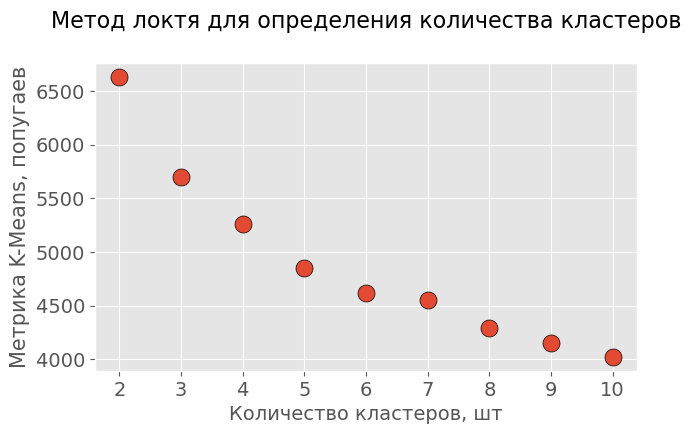

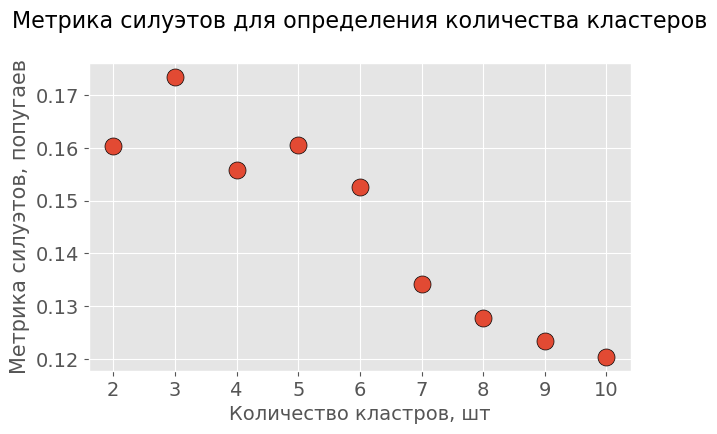

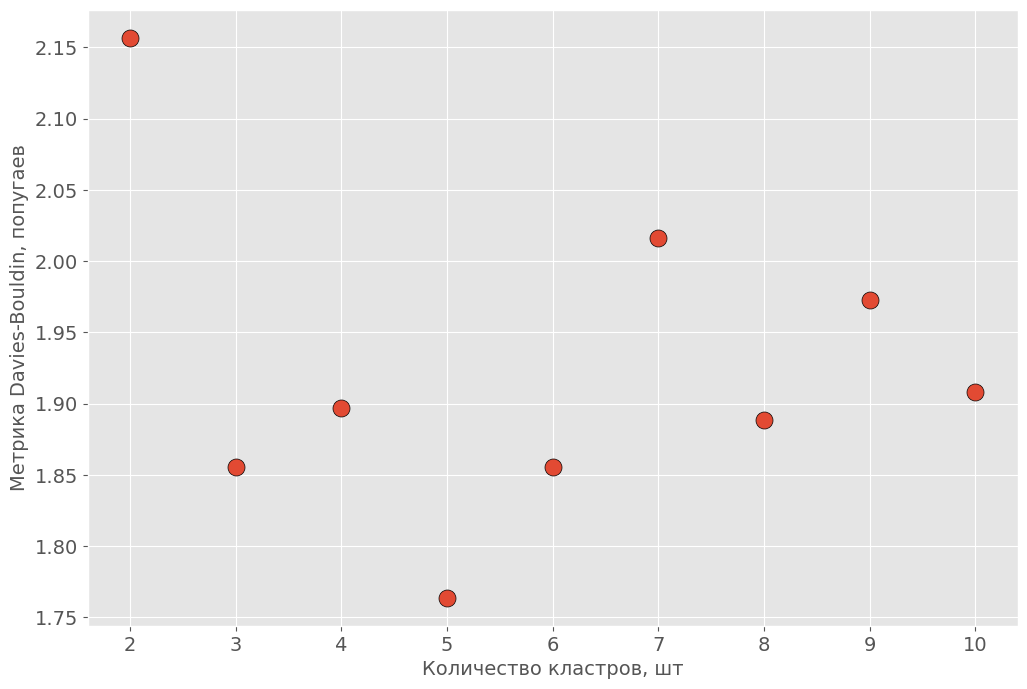

In [18]:
scores = calculate_metrics(dfs, max_clusters)
print_scores(scores)

Получаем, лучшее кол-во кластеров равен 5

In [42]:
model_km_s = KMeans(5, n_init=10)
model_km_s.fit(dfs)
y_pred_km_s = model_km_s.predict(dfs)

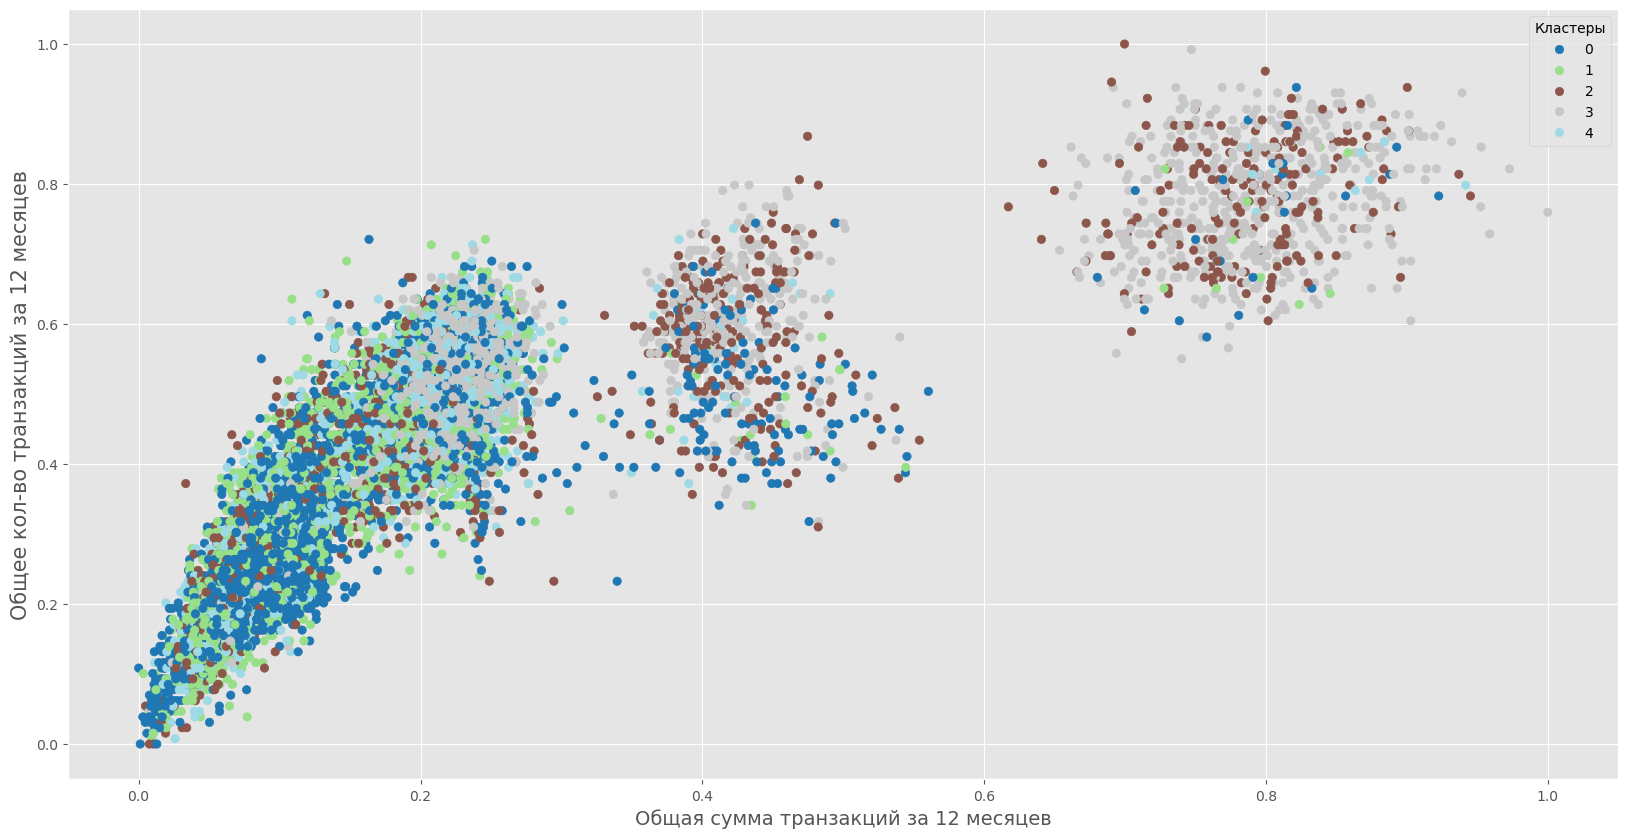

In [43]:
x = dfs['Total_Trans_Amt']
y = dfs['Total_Trans_Ct']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_km_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Общая сумма транзакций за 12 месяцев",fontsize=14)
plt.ylabel("Общее кол-во транзакций за 12 месяцев",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

Проведем кластеризацию методом DBSCAN

In [56]:
model_dbscan_s = DBSCAN(eps=0.15, min_samples=100)
y_pred_dbscan_s = model_dbscan_s.fit_predict(dfs)

In [57]:
model_dbscan_s.get_params()

{'algorithm': 'auto',
 'eps': 0.15,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 100,
 'n_jobs': None,
 'p': None}

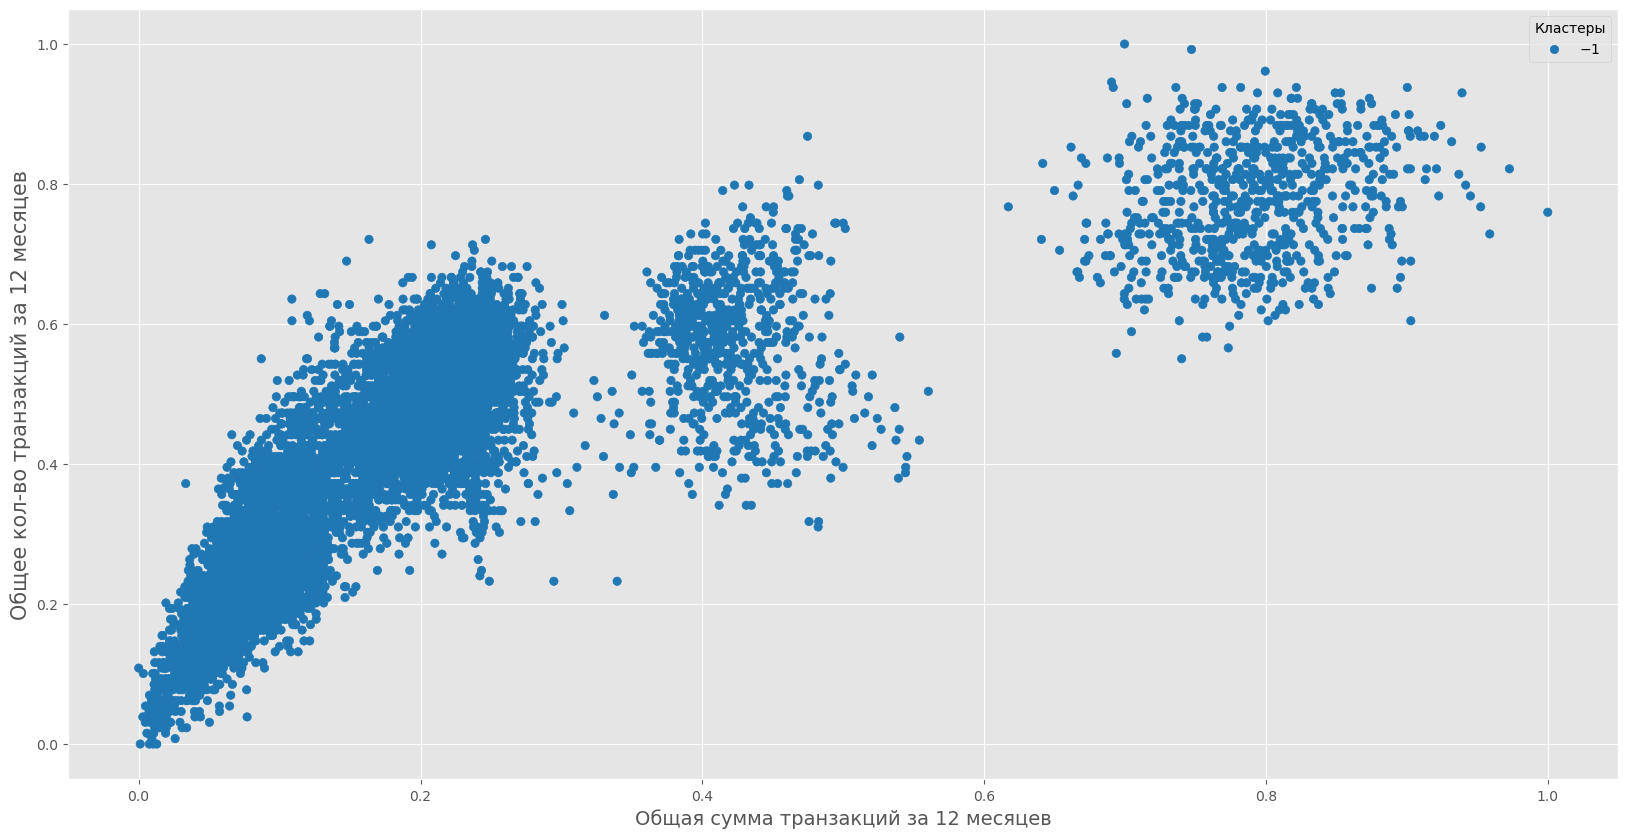

In [58]:
x = dfs['Total_Trans_Amt']
y = dfs['Total_Trans_Ct']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_dbscan_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Общая сумма транзакций за 12 месяцев",fontsize=14)
plt.ylabel("Общее кол-во транзакций за 12 месяцев",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

DBSCAN не выдает болльше одного кластера

In [47]:
np.unique(y_pred_dbscan_s)

array([-1], dtype=int64)

In [48]:
centers = []
for i in range(0,len(model_km_s.cluster_centers_)):
  coordinates = {}
  for j in range(0,len(X.columns)):
    coordinates[X.columns[j]] = scalers[X.columns[j]].inverse_transform(model_km_s.cluster_centers_[i][j].reshape(-1, 1))[0][0]
  centers.append(coordinates)
centers = pd.DataFrame(centers)
centers

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7.349373e+08,46.268651,2.330445,35.863602,3.840241,2.440467,2.609269,5667.995629,145.994348,5522.001281,0.735692,3482.243029,58.721929,0.670781,0.026373
1,7.153496e+08,46.454453,2.236234,35.490143,4.477566,2.309993,2.451054,4421.582937,1665.228076,2756.354861,0.776771,3275.436438,59.512916,0.732186,0.500481
2,7.381144e+08,46.380262,2.545204,35.958592,3.685990,2.291235,2.494134,27874.997239,1221.167702,26653.829538,0.763369,5172.064872,67.214631,0.712159,0.046693
3,7.301136e+08,45.997706,2.418196,35.373089,1.850917,2.250765,2.123089,7416.554434,1506.431193,5910.123242,0.753458,9305.655199,92.072630,0.729333,0.304667
4,7.925893e+08,46.396280,2.336528,37.136979,4.218151,2.351747,2.445321,5227.121477,1549.810598,3677.310879,0.770286,3413.673055,60.915445,0.728550,0.437021


Уменьшение размерности 

In [49]:
from sklearn.manifold import TSNE


In [50]:
X.shape

(10127, 15)

In [51]:

X_embedded = TSNE(
    n_components=2,
    learning_rate='auto',
    init='random',
    perplexity=3
).fit_transform(X)
X_embedded.shape

(10127, 2)

In [52]:
X_embedded[0][0]

-0.02861138

In [53]:
X_embedded[:,0]

array([-2.8611381e-02,  7.4520523e+01, -2.0739096e+01, ...,
        7.3276277e+00, -9.0815532e-01,  5.3894588e+01], dtype=float32)

In [54]:
model_km_embedded = KMeans(5, n_init=10)
model_km_embedded.fit(X_embedded)
y_pred_km_embedded = model_km_embedded.predict(X_embedded)

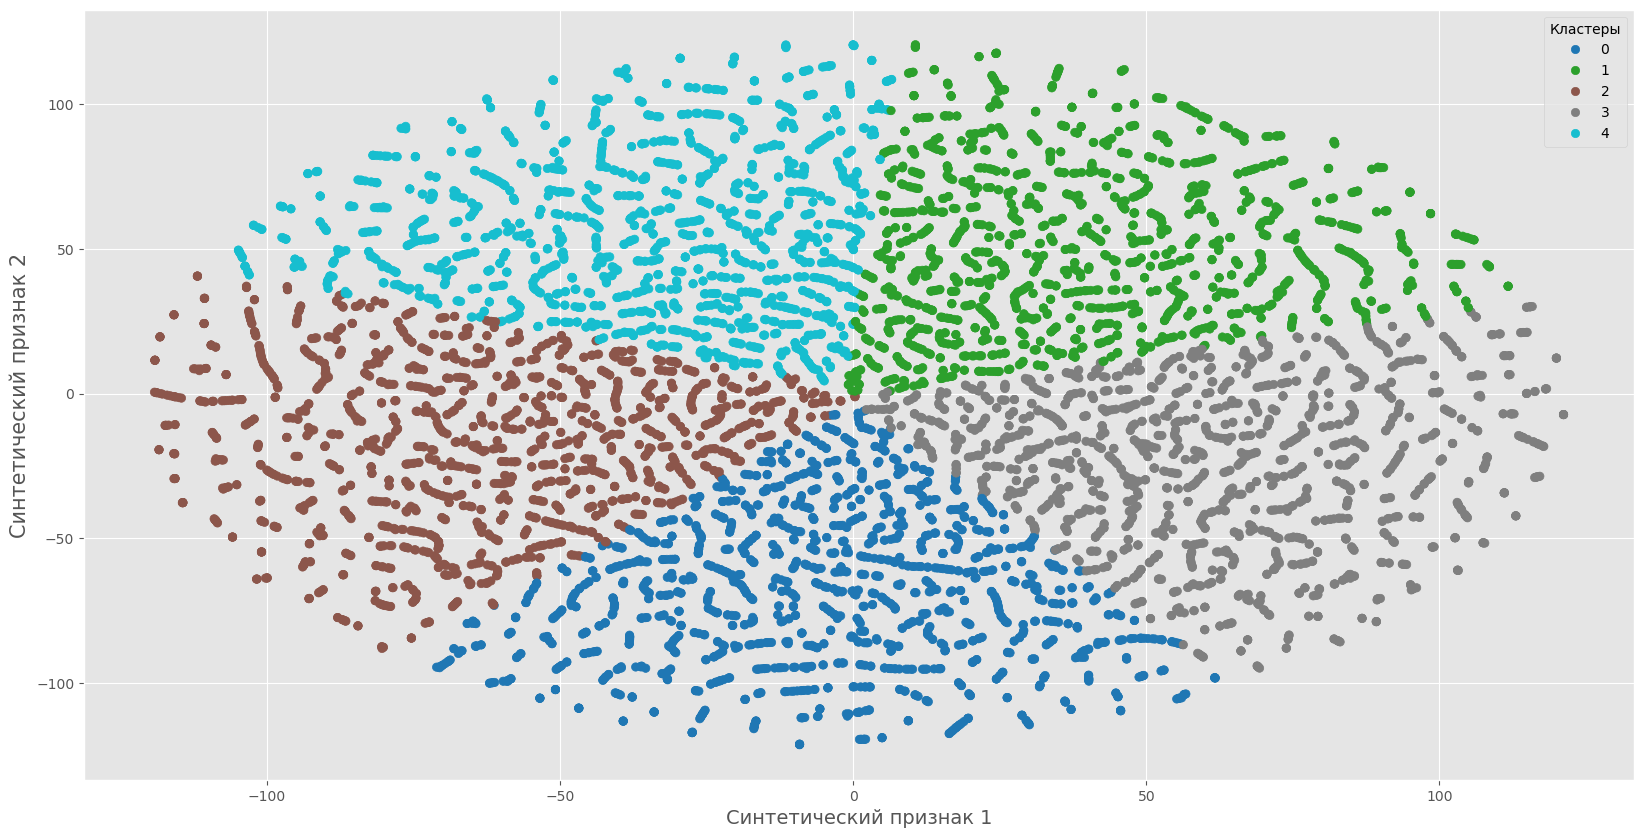

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred_km_embedded, cmap='tab10')
ax.grid(True)
ax.set_xlabel("Синтетический признак 1",fontsize=14)
ax.set_ylabel("Синтетический признак 2",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

В ходе выполнения лабораторной работы были получены навыки обработки данных и подшотовки к дальнейшему анализу. Так же были освоены методы анализа данных путем кластеризации, а именно методом DBSCAN и KMeans. Так же поработал с новыми библиотеками: seaborn и sklearn
Можно сделать пару выводов по лабораторной работе:
- бинарные данные сильно влияют на оформление кластеров, поэтому я их не использовал
- избыточное кол-во данных так же вредит кластеризации (первый датасет определял кол-во кластеров 1.5 часа, после этого решил сменить датасет).